# Frequencies
Understand which frequencies are most important in the time series and select them

In [1]:
from sklearn.svm import SVC
from util import FourierTransformer

import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
df_train = pd.read_csv('data\\train.csv')
# df_train.to_parquet('train.parquet')
# df_train = pd.read_parquet('train.parquet')
df_ts = df_train.iloc[:,5:] # timeseries features only
df_train['y_s'] = df_train.y > 1 # simplified y: label 0 for 1 and 1 for 2,3 

# Explore frequencies

In [58]:
FT = FourierTransformer(k=10, aggregate='median')
df_f = pd.DataFrame(FT.fit_transform(df_ts.values,  df_train.y_s))

df_f

,0,1,2,3,4,5,6,7,8,9,...,281,282,283,284,285,286,287,288,289,290
0,0.020248,0.032455,0.011948,0.008745,0.016895,0.000587,0.000327,0.028403,0.004560,0.000496,...,0.000499,0.000017,0.000002,0.000069,0.000050,4.988551e-06,0.000535,1.256722e-03,0.000030,0.000058
1,0.058051,0.088154,0.137293,0.068665,0.209080,0.138088,0.009229,0.000796,0.000236,0.035688,...,0.000525,0.002223,0.004091,0.000830,0.002625,8.085875e-05,0.000992,7.860731e-04,0.002926,0.000940
2,0.155817,0.965438,0.034941,0.001375,0.057289,0.001105,0.053406,0.005504,0.004214,0.000059,...,0.001641,0.007583,0.000199,0.002647,0.000064,3.405571e-04,0.000348,2.118990e-05,0.000004,0.000001
3,0.005145,0.005551,0.062018,0.011454,0.025805,0.013612,0.002053,0.030167,0.017068,0.227079,...,0.000302,0.000016,0.000287,0.000289,0.000416,7.701140e-05,0.000034,4.979192e-06,0.000002,0.000003
4,0.006329,0.008593,0.001741,0.000564,0.001172,0.003411,0.000069,0.000022,0.000007,0.000643,...,0.000363,0.000115,0.001160,0.000014,0.000004,1.882341e-07,0.000016,1.441366e-05,0.000011,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,0.003595,0.006127,0.058525,0.000955,0.008293,0.011627,0.002389,0.011223,0.091608,0.032407,...,0.001281,0.000040,0.000869,0.000088,0.000343,4.278260e-05,0.000241,5.841756e-04,0.000546,0.000038
659,0.000741,0.001979,0.061039,0.000048,0.041898,0.000710,0.009713,0.000058,0.004019,0.004550,...,0.000056,0.000025,0.000170,0.000181,0.000088,4.798069e-04,0.000005,5.402152e-07,0.000001,0.000128
660,0.004207,0.004904,0.042740,0.019781,0.053216,0.006756,0.000141,0.094251,0.006436,0.025297,...,0.000696,0.000003,0.000003,0.000048,0.000013,1.541800e-06,0.000219,9.361586e-05,0.000172,0.002484
661,0.087684,0.194766,0.144451,0.000420,0.010870,0.005078,0.002553,0.001140,0.008973,0.032623,...,0.000105,0.001356,0.025133,0.002788,0.000316,7.043901e-05,0.000147,9.859322e-05,0.000019,0.000115


In [57]:
list(map(len, FT.freq_idx))

[2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 4, 2, 4, 2, 3, 2, 3]

In [ ]:
df_f.columns = 

# fit model

In [4]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline



In [61]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(df_ts.values, df_train.y, test_size=0.3, stratify=df_train.y)
model = make_pipeline(
    FourierTransformer(k=20, aggregate='median'),
    SVC(class_weight='balanced', random_state=1798)
)
model.fit(x_train,y_train)

Pipeline(steps=[('fouriertransformer',
                 FourierTransformer(aggregate='median', k=20)),
                ('svc', SVC(class_weight='balanced', random_state=1798))])

(array([[64, 51, 71],
        [ 3,  4,  5],
        [ 0,  1,  0]], dtype=int64),
 0.22580645161290325)

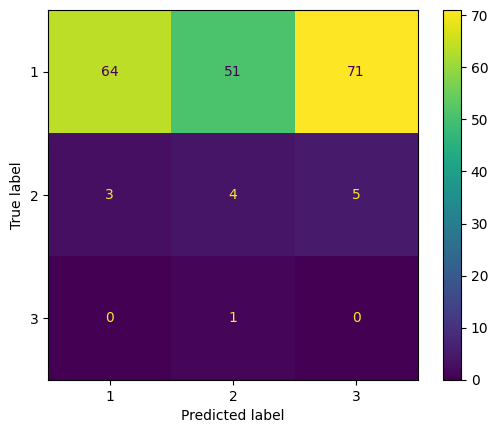

In [62]:
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay

y_hat = model.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat)

confusion_matrix(y_test,y_hat),balanced_accuracy_score(y_test, y_hat)

## gridsearch

In [79]:
from util import OrdinalClassifier

pipe = make_pipeline(
    FourierTransformer(),
    OrdinalClassifier(SVC(class_weight='balanced'))
)

pipe.steps

[('fouriertransformer', FourierTransformer()),
 ('ordinalclassifier',
  OrdinalClassifier(classifier=SVC(class_weight='balanced')))]

In [81]:
params = {
    'ordinalclassifier__C' : np.linspace(0.5,2,10),
    # 'ordinalclassifier__kernel':['poly','rbf','linear'],
    'fouriertransformer__k': [10,20,30,40,50,60,70],
    'fouriertransformer__aggregate': ['low_filter']
    }

In [82]:
skf = StratifiedKFold(n_splits=4)
cv = GridSearchCV(
    pipe, 
    param_grid=params, 
    scoring='balanced_accuracy', 
    n_jobs=-1, 
    cv=skf.split(df_ts, df_train.y)
)
cv.fit(df_ts.values,df_train.y)

cv.best_params_, cv.best_score_

KeyboardInterrupt: 

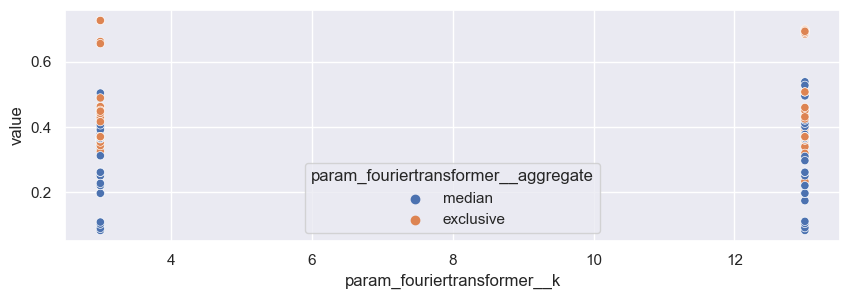

In [71]:
from util import plot_cv_results
# plot_cv_results(cv, 'param_C', 'param_kernel')
# plot_cv_results(cv, 'param_n_neighbors', 'param_weights')
plot_cv_results(cv, 'param_fouriertransformer__k', 'param_fouriertransformer__aggregate')

In [73]:
from sklearn.metrics import balanced_accuracy_score, ConfusionMatrixDisplay

y_hat = cv.predict(df_ts.values)

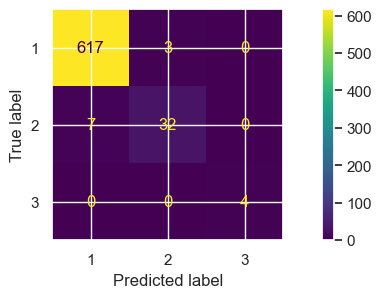

In [74]:
balanced_accuracy_score(df_train.y, y_hat)
ConfusionMatrixDisplay.from_predictions(df_train.y, y_hat)

# Submission

In [76]:
pipe = cv

In [75]:
df_sub = pd.read_csv('data\\test.csv')


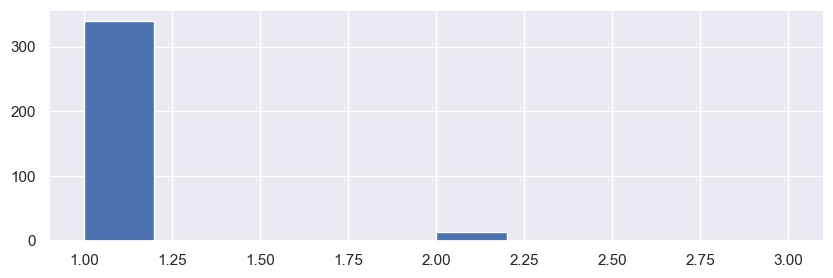

In [78]:
from datetime import datetime
import matplotlib.pyplot as plt
y_sub = pipe.predict(df_sub.iloc[:,4:].values)
plt.hist(y_sub)
submission_df = pd.DataFrame(y_sub,columns=['y'])
submission_df['id'] = df_sub.id
submission_df.set_index('id', inplace=True)
# submission_df.y = submission_df.y
submission_df.to_csv(f'data\\submissions\\summary_{datetime.now().strftime("%H.%M_%d")}.csv')